In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [19]:
air_df=pd.read_csv('AirPassengers.csv')

In [20]:
air_df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


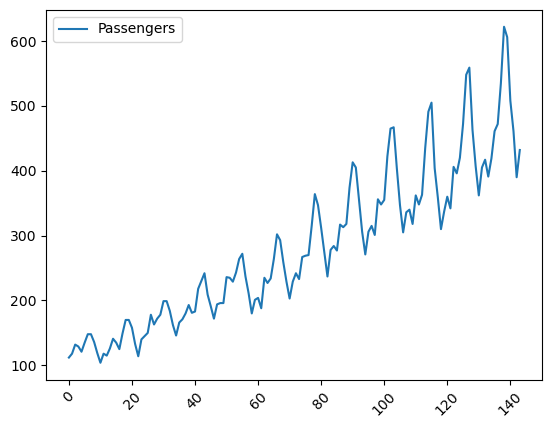

In [21]:
air_df.plot()
plt.xticks(rotation=45)
plt.show()

In [22]:
y_train=air_df['Passengers'][:-15]
y_test=air_df['Passengers'][-15:]
span=3

## Simple Exponential Smoothing

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses=SimpleExpSmoothing(y_train)

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


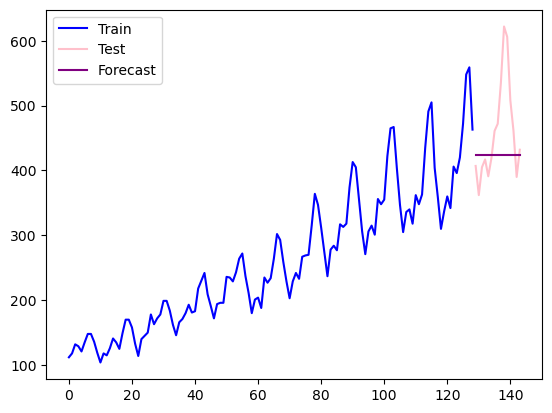

RSME =  82.93710576932317


In [25]:
fit1=ses.fit(smoothing_level=0.1)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mse(y_test,fcast1)))